In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
df=pd.read_csv('D:\Data science\Python\Datasets\iris\iris.csv')

In [143]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [144]:
df["class"].replace({"Setosa":"0","Versicolor":"1","Virginica":"2"},inplace=True)
print(df)

     sepal-length  sepal-width  petal-length  petal-width class
0             5.1          3.5           1.4          0.2     0
1             4.9          3.0           1.4          0.2     0
2             4.7          3.2           1.3          0.2     0
3             4.6          3.1           1.5          0.2     0
4             5.0          3.6           1.4          0.2     0
..            ...          ...           ...          ...   ...
145           6.7          3.0           5.2          2.3     2
146           6.3          2.5           5.0          1.9     2
147           6.5          3.0           5.2          2.0     2
148           6.2          3.4           5.4          2.3     2
149           5.9          3.0           5.1          1.8     2

[150 rows x 5 columns]


In [145]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [147]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [148]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


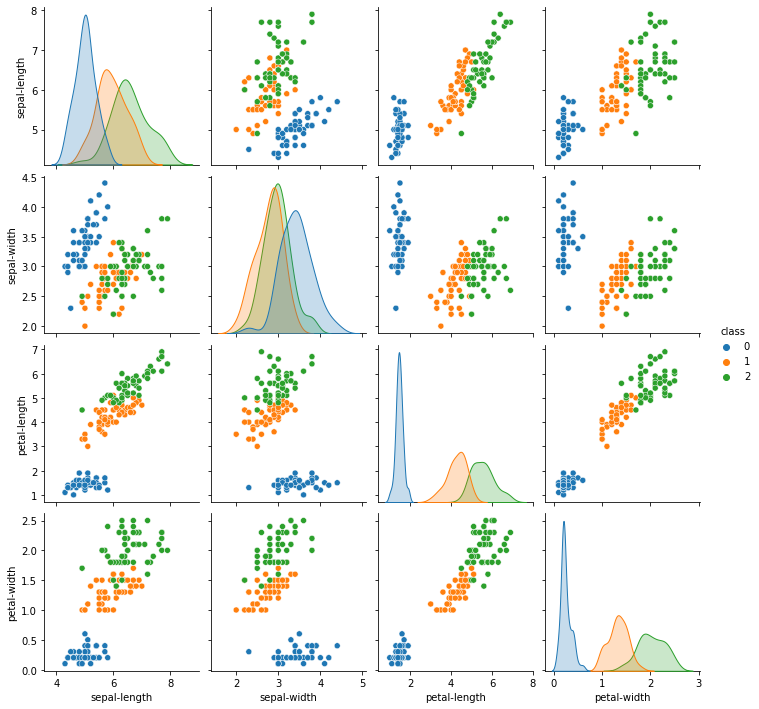

In [152]:
import seaborn as sns
sns.pairplot(df, hue='class')

In [153]:
df.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.117570,0.871754,0.817941
sepal-width,-0.117570,1.000000,-0.428440,-0.366126
petal-length,0.871754,-0.428440,1.000000,0.962865
petal-width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

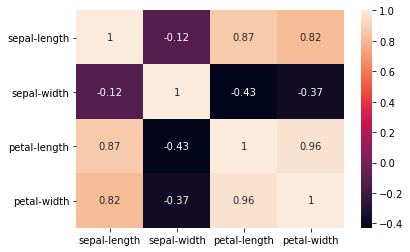

In [157]:
sns.heatmap(df.corr(),annot=True)

# Modelling Without PCA


In [158]:
X=df.iloc[:,:-1]

In [160]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
y=df.iloc[:,-1]

In [164]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: object

In [165]:
from sklearn.preprocessing import StandardScaler

In [167]:
sd=StandardScaler()

In [169]:
X=sd.fit_transform(X)

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rfc=RandomForestClassifier()

In [173]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [174]:
y_pred=rfc.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9555555555555556

# Model with PCA


In [176]:
from sklearn.decomposition import PCA
pca=PCA()
X_new=pca.fit_transform(X)

In [177]:
pca.get_covariance()

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [178]:
explained_variance=pca.explained_variance_ratio_

In [179]:
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

<BarContainer object of 4 artists>

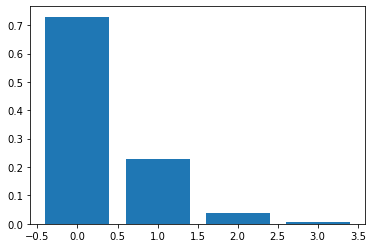

In [180]:
plt.bar(range(4),explained_variance)

In [199]:
pca=PCA(n_components=1)
X_new=pca.fit_transform(X)

In [200]:
from sklearn.model_selection import train_test_split
X_train_new,X_test_new,y_train,y_test=train_test_split(X_new,y, test_size=0.3, random_state=1)

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
rfc=RandomForestClassifier()

In [203]:
rfc.fit(X_train_new,y_train)

RandomForestClassifier()

In [204]:
y_pred=rfc.predict(X_test_new)

In [205]:
from sklearn.metrics import accuracy_score

In [206]:
accuracy_score(y_test,y_pred)

0.9111111111111111